<a href="https://colab.research.google.com/github/leojkn/Projeto_leonardo/blob/main/wind_Trabalho_oficial_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho_do_arquivo = '/content/drive/My Drive/amazon.csv'
df = pd.read_csv(caminho_do_arquivo, encoding='ISO-8859-1')
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [ ]:
# Identificando como cada estado está escrito
valores_unicos = df['state'].unique()

# Para mostrar cada valor único
for valor in valores_unicos:
    print(valor)

Acre
Alagoas
Amapa
Amazonas
Bahia
Ceara
Distrito Federal
Espirito Santo
Goias
Maranhao
Mato Grosso
Minas Gerais
Pará
Paraiba
Pernambuco
Piau
Rio
Rondonia
Roraima
Santa Catarina
Sao Paulo
Sergipe
Tocantins


In [ ]:
# Dicionário com os nomes dos estados e suas respectivas siglas
estados_siglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapa': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceara': 'CE',
    'Distrito Federal': 'DF',
    'Espirito Santo': 'ES',
    'Goias': 'GO',
    'Maranhao': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraiba': 'PB',
    'Parana': 'PR',
    'Pernambuco': 'PE',
    'Piaui': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondonia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sao Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

In [ ]:
# Substituindo os nomes dos estados por suas siglas na coluna 'state'
df['state'] = df['state'].replace(estados_siglas)

In [ ]:
df.head()

,year,state,month,number,date
0,1998,AC,Janeiro,0.0,1998-01-01
1,1999,AC,Janeiro,0.0,1999-01-01
2,2000,AC,Janeiro,0.0,2000-01-01
3,2001,AC,Janeiro,0.0,2001-01-01
4,2002,AC,Janeiro,0.0,2002-01-01


In [ ]:
# Identificando como cada Mês está escrito
valores_unicos = df['month'].unique()

# Para mostrar cada valor único
for valor in valores_unicos:
    print(valor)

Janeiro
Fevereiro
Março
Abril
Maio
Junho
Julho
Agosto
Setembro
Outubro
Novembro
Dezembro


In [ ]:
abreviacoes_meses = {
    'Janeiro': 'JAN',
    'Fevereiro': 'FEV',
    'Março': 'MAI',
    'Abril': 'ABR',
    'Maio': 'MAI',
    'Junho': 'JUN',
    'Julho': 'JUL',
    'Agosto': 'AGO',
    'Setembro': 'SET',
    'Outubro': 'OUT',
    'Novembro': 'NOV',
    'Dezembro': 'DEZ'
}

In [ ]:
df['month'] = df['month'].map(abreviacoes_meses)

In [ ]:
df.head()


,year,state,month,number,date
0,1998,AC,JAN,0.0,1998-01-01
1,1999,AC,JAN,0.0,1999-01-01
2,2000,AC,JAN,0.0,2000-01-01
3,2001,AC,JAN,0.0,2001-01-01
4,2002,AC,JAN,0.0,2002-01-01


In [ ]:
tamanho_estados = {
    'AC': 164123.964,
    'AL': 27848140,
    'AP': 142470.762,
    'AM': 1559167.889,
    'BA': 564760.427,
    'CE': 148894.441,
    'DF': 5760783,
    'ES': 46074.447,
    'GO': 340203.329,
    'MA': 329642.182,
    'MT': 903207.019,
    'MS': 357145.534,
    'MG': 586521.123,
    'PA': 1245870.798,
    'PB': 56467.242,
    'PR': 199298.979,
    'PE': 98067881,
    'PI': 251756.515,
    'RJ': 43750427,
    'RN': 52809.602,
    'RS': 281707.156,
    'RO': 237765.24,
    'RR': 223644.527,
    'SC': 95730.684,
    'SP': 248219481,
    'SE': 21925424,
    'TO': 277466.763
}

In [ ]:
# Primeiro, vamos garantir que os nomes dos estados no DataFrame estejam no mesmo formato que as chaves do dicionário
df['state'] = df['state'].apply(lambda x: x.strip())

In [ ]:
# Agora, vamos mapear os tamanhos dos estados do dicionário para o DataFrame
df['tamanho_estado_km2'] = df['state'].map(tamanho_estados)

In [ ]:
df.head()


,year,state,month,number,date,tamanho_estado_km2
0,1998,AC,JAN,0.0,1998-01-01,164123.964
1,1999,AC,JAN,0.0,1999-01-01,164123.964
2,2000,AC,JAN,0.0,2000-01-01,164123.964
3,2001,AC,JAN,0.0,2001-01-01,164123.964
4,2002,AC,JAN,0.0,2002-01-01,164123.964


In [ ]:
# Identificando como cada Mês está escrito
valores_unicos = df['year'].unique()

# Para mostrar cada valor único
for valor in valores_unicos:
    print(valor)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


Subindo as planilhas com os dados de população ano a ano, de 1998 até 2017
fonte: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=17283&t=downloads

In [ ]:
# Subindo os dados de pupulação de 1998 até 2017
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTrljnnpAn8c5idniPfGxtZQIPxBgmcNf7VDcWlaQAwTn4gG5pkSqcXWBITI8yR3ITP1KE-kV5CYb86/pub?output=csv"

pupulacao_1998_2017 = pd.read_csv(url)
print(pupulacao_1998_2017)

    state   pupulacao  year
0      RO   1276173.0  1998
1      AC    514050.0  1998
2      AM   2520684.0  1998
3      RR    260705.0  1998
4      PA   5768476.0  1998
..    ...         ...   ...
535    RS  11322895.0  2017
536    MS   2713147.0  2017
537    MT   3344544.0  2017
538    GO   6778772.0  2017
539    DF   3039444.0  2017

[540 rows x 3 columns]


In [ ]:
df = pd.merge(df, pupulacao_1998_2017, on=['state', 'year'], how='left')
df.head()

,year,state,month,number,date,tamanho_estado_km2,pupulacao
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514050.0
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527937.0
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541873.0
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574355.0
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586942.0


In [ ]:
estado = df['state'].tolist()

DF latitude e longetude aqui:
https://github.com/kelvins/municipios-brasileiros

In [ ]:
caminho_do_arquivo_estado = '/content/drive/My Drive/estados.csv'
df_estado = pd.read_csv(caminho_do_arquivo_estado, encoding='ISO-8859-1',float_precision='round_trip',decimal='.')
df_estado.tail()

,ï»¿codigo_uf,uf,nome,latitude,longitude,regiao
22,43,RS,Rio Grande do Sul,-30.17,-53.50,Sul
23,50,MS,Mato Grosso do Sul,-20.51,-54.54,Centro-Oeste
24,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste
25,52,GO,GoiÃ¡s,-15.98,-49.86,Centro-Oeste
26,53,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste


In [ ]:
df_estado = df_estado.rename(columns={"uf": "state"})
df_estado.head(50)


,ï»¿codigo_uf,state,nome,latitude,longitude,regiao
0,11,RO,RondÃ´nia,-10.83,-63.34,Norte
1,12,AC,Acre,-8.77,-70.55,Norte
2,13,AM,Amazonas,-3.47,-65.10,Norte
3,14,RR,Roraima,1.99,-61.33,Norte
4,15,PA,ParÃ¡,-3.79,-52.48,Norte
5,16,AP,AmapÃ¡,1.41,-51.77,Norte
6,17,TO,Tocantins,-9.46,-48.26,Norte
7,21,MA,MaranhÃ£o,-5.42,-45.44,Nordeste
8,22,PI,PiauÃ­,-6.60,-42.28,Nordeste
9,23,CE,CearÃ¡,-5.20,-39.53,Nordeste


In [ ]:
df_estado = df_estado[['state', 'latitude', 'longitude']]
df_estado.head()

,state,latitude,longitude
0,RO,-10.83,-63.34
1,AC,-8.77,-70.55
2,AM,-3.47,-65.10
3,RR,1.99,-61.33
4,PA,-3.79,-52.48


In [ ]:
df = pd.merge(df, df_estado, on=['state'], how='left')
df.head()

,year,state,month,number,date,tamanho_estado_km2,pupulacao,latitude,longitude
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514050.0,-8.77,-70.55
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527937.0,-8.77,-70.55
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541873.0,-8.77,-70.55
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574355.0,-8.77,-70.55
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586942.0,-8.77,-70.55


coordenadas_estados = {}

for index, row in df.iterrows():
    coordenadas_estados[row['state']] = {'latitude': row['latitude'], 'longitude': row['longitude']}

print(coordenadas_estados)

In [ ]:
mes_number = {
    'JAN': 1,
    'FEV':2,
    'MAR': 3,
    'ABR': 4,
    'MAI': 5,
    'JUN': 6,
    'JUL': 7,
    'AGO': 8,
    'SET': 9,
    'OUT': 10,
    'NOV': 11,
    'DEZ': 12,
}

In [ ]:
# Agora, vamos mapear os tamanhos dos estados do dicionário para o DataFrame
df['month_number'] = df['month'].map(mes_number)
df.head()

,year,state,month,number,date,tamanho_estado_km2,pupulacao,latitude,longitude,month_number
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514050.0,-8.77,-70.55,1
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527937.0,-8.77,-70.55,1
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541873.0,-8.77,-70.55,1
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574355.0,-8.77,-70.55,1
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586942.0,-8.77,-70.55,1


In [ ]:
# Adiciona colunas vazias para os novos dados
df['Umidade Relativa do Ar (%)'] = None
df['Velocidade do Vento (km/h)'] = None
df['Precipitação (mm)'] = None
df.head()

,year,state,month,number,date,tamanho_estado_km2,pupulacao,latitude,longitude,month_number,Umidade Relativa do Ar (%),Precipitação (mm),Velocidade do Vento (km/h)
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514.050,-8.77,-70.55,1,None,None,None
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527.937,-8.77,-70.55,1,None,None,None
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541.873,-8.77,-70.55,1,None,None,None
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574.355,-8.77,-70.55,1,None,None,None
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586.942,-8.77,-70.55,1,None,None,None


In [ ]:
# Função para fazer a chamada à API e obter os dados
def get_climate_data(latitude, longitude, year, month):
    API_KEY = '5VkLFTudR0YztNfx'
    BASE_URL = 'http://my.meteoblue.com/packages/modelclimate-day'
    startdate = f'{year}-{month:02d}-01'
    enddate = f'{year}-{month:02d}-28'  # Simplificação para o exemplo
    params = {
        'lat': latitude,
        'lon': longitude,
        'domain': 'NEMS4',
        'startdate': startdate,
        'enddate': enddate,
        'apikey': API_KEY,
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        # Extrai os dados específicos da resposta da API
        # Nota: Ajuste os caminhos de acesso aos dados conforme a estrutura real da resposta da API
        precipitacao = data['data']['climate']['precipitation_monthly_mean']
        vento = data['data']['climate']['wind_speed_monthly_mean']
        return precipitacao, vento
    else:
        return None, None

In [ ]:
# Iterar sobre o DataFrame e preencher as novas colunas com dados da API
for index, row in df.iterrows():
    precipitacao, vento = get_climate_data(row['latitude'], row['longitude'], row['year'], row['month_number'])
    df.at[index, 'Precipitação (mm)'] = precipitacao
    df.at[index, 'Velocidade do Vento (km/h)'] = vento

# Salva o DataFrame atualizado
df.to_csv('updated_dataframe.csv', index=False)

In [ ]:
# Substitua YOUR_API_KEY pela sua chave de API real
API_KEY = '5VkLFTudR0YztNfx'
BASE_URL = f'https://my.meteoblue.com/history/point?start=1998-01-01&end=2017-12-31&lat={latitude}&lon={longitude}&variable=temperature&precipitation&windspeed&relativehumidity&apikey=5VkLFTudR0YztNfx'

# Supondo que você tenha um DataFrame chamado df com as colunas mencionadas
# Adicionaremos colunas vazias para os novos dados
for col in ['Umidade Relativa do Ar (%)', 'Precipitação (mm)', 'Velocidade do Vento (km/h)']:
    df[col] = None

In [ ]:
# Função para fazer a chamada à API e obter os dados
def get_weather_data(latitude, longitude, date):
    API_KEY = '5VkLFTudR0YztNfx'
    BASE_URL = f'https://my.meteoblue.com/history/point?start=1998-01-01&end=2017-12-31&lat={latitude}&lon={longitude}&variable=temperature&precipitation&windspeed&relativehumidity&apikey=5VkLFTudR0YztNfx'
    params = {
        'lat': latitude,
        'lon': longitude,
        'start': date,
        'end': date,
        'variable': 'all',  # Solicita todas as variáveis disponíveis
        'apikey': API_KEY,
        'format': 'json'
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        # Extrai os dados específicos da resposta da API
        umidade = data['data']['history']['day'][0]['relativehumidity_mean']
        vento = data['data']['history']['day'][0]['windspeed_max']
        precipitacao = data['data']['history']['day'][0]['precipitation_sum']
        return umidade, vento, precipitacao
    else:
        return None, None, None

In [ ]:
# Iterar sobre o DataFrame e preencher as novas colunas com dados da API
for index, row in df.iterrows():
    umidade, vento, precipitacao = get_weather_data(row['latitude'], row['longitude'], row['date'])
    df.at[index, 'Umidade Relativa do Ar (%)'] = umidade
    df.at[index, 'Velocidade do Vento (km/h)'] = vento
    df.at[index, 'Precipitação (mm)'] = precipitacao

# Salva o DataFrame atualizado
df.to_csv('updated_dataframe.csv', index=False)

In [ ]:
API_KEY = '5VkLFTudR0YztNfx'
BASE_URL = 'http://my.meteoblue.com/packages/modelclimate-day'

In [ ]:
# Função modificada para aceitar uma tupla de argumentos
def get_climate_data(params):
    latitude, longitude, year, month = params
    startdate = f'{year}-{month:02d}-01'
    enddate = f'{year}-{month:02d}-28'  # Simplificação para o exemplo
    response = requests.get(BASE_URL, params={
        'lat': latitude,
        'lon': longitude,
        'domain': 'NEMS4',
        'startdate': startdate,
        'enddate': enddate,
        'apikey': API_KEY,
    })
    if response.status_code == 200:
        data = response.json()
        precipitacao = data['data']['climate']['precipitation_monthly_mean']
        vento = data['data']['climate']['wind_speed_monthly_mean']
        return (latitude, longitude, year, month, precipitacao, vento)
    else:
        return (latitude, longitude, year, month, None, None)

In [ ]:
# Preparar os parâmetros para as chamadas à API
params_list = [(row['latitude'], row['longitude'], row['year'], row['month_number']) for index, row in df.iterrows()]

In [ ]:
# Usar ThreadPoolExecutor para fazer chamadas à API em paralelo
results = []
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(get_climate_data, params_list))

In [ ]:
# Atualizar o DataFrame com os resultados
for result in results:
    latitude, longitude, year, month, precipitacao, vento = result
    df.loc[(df['latitude'] == latitude) & (df['longitude'] == longitude) & (df['year'] == year) & (df['month_number'] == month), 'Precipitação (mm)'] = precipitacao
    df.loc[(df['latitude'] == latitude) & (df['longitude'] == longitude) & (df['year'] == year) & (df['month_number'] == month), 'Velocidade do Vento (km/h)'] = vento

In [ ]:
# Salvar o DataFrame atualizado
df.to_csv('updated_dataframe.csv', index=False)

In [ ]:
df.head(10)


,year,state,month,number,date,tamanho_estado_km2,pupulacao,latitude,longitude,month_number
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514.050,-8.77,-70.55,1
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527.937,-8.77,-70.55,1
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541.873,-8.77,-70.55,1
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574.355,-8.77,-70.55,1
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586.942,-8.77,-70.55,1
5,2003,AC,JAN,10.0,2003-01-01,164123.964,600.595,-8.77,-70.55,1
6,2004,AC,JAN,0.0,2004-01-01,164123.964,630.328,-8.77,-70.55,1
7,2005,AC,JAN,12.0,2005-01-01,164123.964,669.736,-8.77,-70.55,1
8,2006,AC,JAN,4.0,2006-01-01,164123.964,686.652,-8.77,-70.55,1
9,2007,AC,JAN,0.0,2007-01-01,164123.964,68665.2,-8.77,-70.55,1


In [ ]:
def get_climate_data(params):
    latitude, longitude, year, month = params
    startdate = f'{year}-{month:02d}-01'
    enddate = f'{year}-{month:02d}-28'  # Ajuste conforme necessário
    response = requests.get(BASE_URL, params={
        'lat': latitude,
        'lon': longitude,
        'domain': 'NEMS4',
        'startdate': startdate,
        'enddate': enddate,
        'apikey': API_KEY,
    })
    if response.status_code == 200:
        data = response.json()
        # Verifique a estrutura da resposta e ajuste os caminhos conforme necessário
        precipitacao = data.get('data', {}).get('climate', {}).get('precipitation_monthly_mean', None)
        vento = data.get('data', {}).get('climate', {}).get('wind_speed_monthly_mean', None)
        return (latitude, longitude, year, month, precipitacao, vento)
    else:
        print(f"Erro na API: {response.status_code}")
        return (latitude, longitude, year, month, None, None)

In [ ]:
# Teste com uma chamada simples
teste_params = (-23.550520, -46.633308, 1999, 1)  # Exemplo de coordenadas e data
resultado_teste = get_climate_data(teste_params)
print("Resultado do teste:", resultado_teste)

Erro na API: 403
Resultado do teste: (-23.55052, -46.633308, 1999, 1, None, None)


In [ ]:
# Corrigir o nome da coluna de população
df.rename(columns={'pupulacao': 'populacao'}, inplace=True)

In [ ]:
codigo_estado = {
    'AC': 1,
    'AL': 2,
    'AP': 3,
    'AM': 4,
    'BA': 5,
    'CE': 6,
    'DF': 7,
    'ES': 8,
    'GO': 9,
    'MA': 10,
    'MT': 11,
    'MS': 12,
    'MG': 13,
    'PA': 14,
    'PB': 15,
    'PR': 16,
    'PE': 17,
    'PI': 18,
    'RJ': 19,
    'RN': 20,
    'RS': 21,
    'RO': 22,
    'RR': 23,
    'SC': 24,
    'SP': 25,
    'SE': 26,
    'TO': 27
}

In [ ]:
df['cod_estado'] = df['state'].map(codigo_estado)
df.head()


,year,state,month,number,date,tamanho_estado_km2,populacao,latitude,longitude,month_number,cod_estado
0,1998,AC,JAN,0.0,1998-01-01,164123.964,514050.0,-8.77,-70.55,1,1.0
1,1999,AC,JAN,0.0,1999-01-01,164123.964,527937.0,-8.77,-70.55,1,1.0
2,2000,AC,JAN,0.0,2000-01-01,164123.964,541873.0,-8.77,-70.55,1,1.0
3,2001,AC,JAN,0.0,2001-01-01,164123.964,574355.0,-8.77,-70.55,1,1.0
4,2002,AC,JAN,0.0,2002-01-01,164123.964,586942.0,-8.77,-70.55,1,1.0


In [ ]:
df_cor = df.drop(columns=['date', 'month','state'])

In [ ]:
corr_matrix = df_cor.corr()

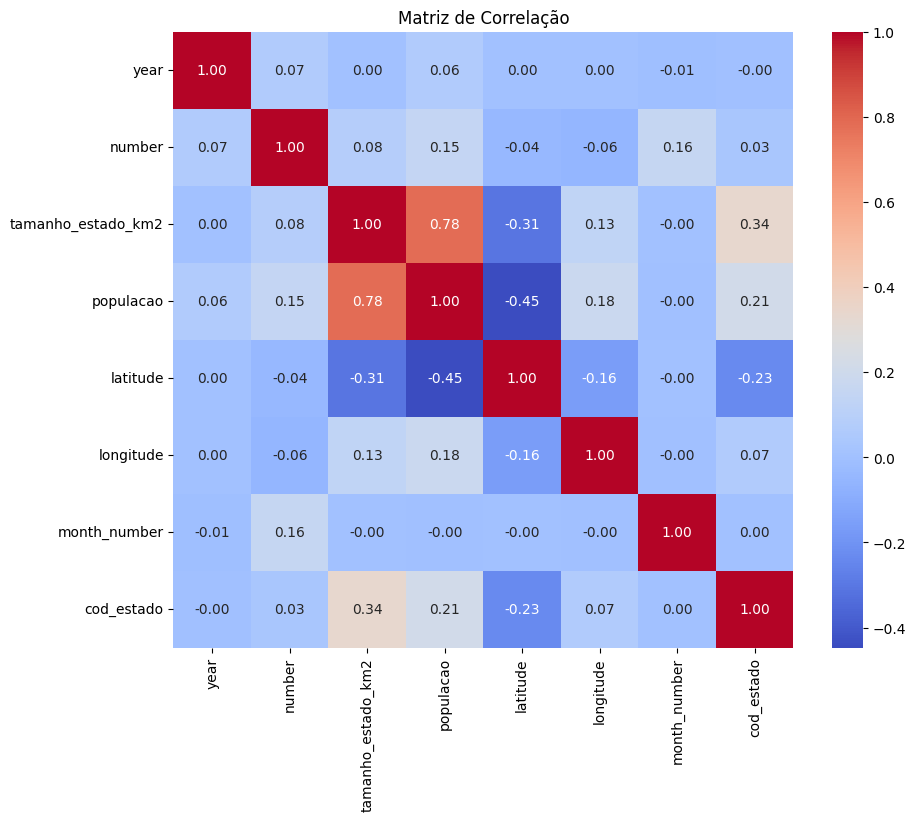

In [ ]:
# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()